<a href="https://colab.research.google.com/github/rksiitd1/Colab-notebooks/blob/main/LaxmanAssignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the path to your FASTA file: /content/NC_000017.11.fasta
Enter the desired window size: 1000


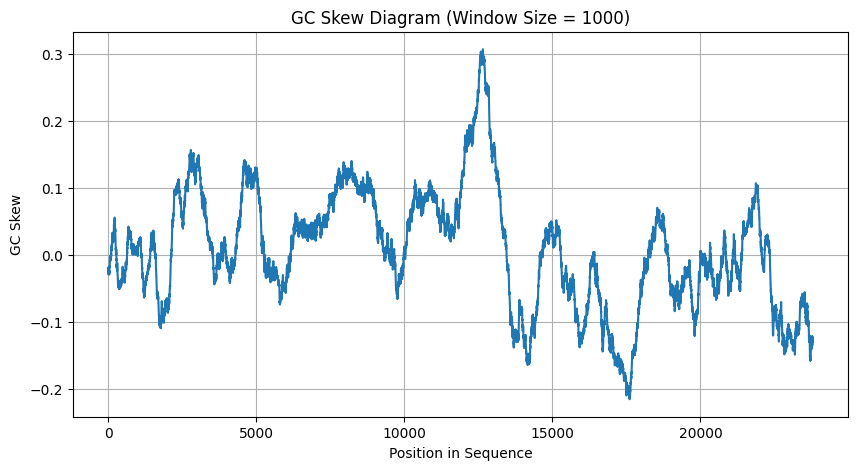

In [ ]:
import matplotlib.pyplot as plt

def calculate_gc_skew(sequence, window_size):
    """Calculates the GC skew for a given nucleotide sequence and window size.

    Args:
        sequence (str): The input nucleotide sequence.
        window_size (int): The size of the sliding window.

    Returns:
        list: A list of GC skew values for each window position.
    """

    gc_skew = []
    for i in range(len(sequence) - window_size + 1):
        window = sequence[i:i + window_size]
        g_count = window.count('G')
        c_count = window.count('C')
        gc_skew.append((g_count - c_count) / (g_count + c_count))
    return gc_skew

def read_fasta(file_path):
    """Reads a FASTA file and returns the first sequence found.

    Args:
        file_path (str): The path to the FASTA file.

    Returns:
        str: The nucleotide sequence.
    """

    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Assumes the sequence starts on the second line
        sequence = ''.join(lines[1:]).replace("\n", "")
    return sequence

def plot_gc_skew(gc_skew, window_size):
    """Plots the GC skew diagram.

    Args:
        gc_skew (list): A list of GC skew values.
        window_size (int): The size of the sliding window.
    """

    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
    plt.plot(range(len(gc_skew)), gc_skew)
    plt.xlabel('Position in Sequence')
    plt.ylabel('GC Skew')
    plt.title(f'GC Skew Diagram (Window Size = {window_size})')
    plt.grid(True)
    plt.show()

# --- Main Execution ---
if __name__ == '__main__':
    fasta_file = input("Enter the path to your FASTA file: ")
    window_size = int(input("Enter the desired window size: "))

    sequence = read_fasta(fasta_file)
    gc_skew = calculate_gc_skew(sequence, window_size)

    with open("gc_skew_output.txt", "w") as f:
        for value in gc_skew:
            f.write(str(value) + "\n")

    plot_gc_skew(gc_skew, window_size)
